# scenario

For this project, I will assume the role of a  Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. My job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping.
The stocks I will worked with are :

* Apple
* Advanced Micro Devices(amd)
* Netflix
* Amazon
* Tesla
* GameStop(gme)

# Installing Libraries

In [1]:
!pip install yfinance
import yfinance as yf
!pip install nbformat
!mamba install bs4 == 4.10.0 -y
from bs4 import BeautifulSoup
!mamba install html5lib == 1.1 -y
import pandas as pd
import numpy as np
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293633 sha256=08cc47e05a931c2b49e1e2fcdda8d6119ffc39d611abd2483e5298028d24816d
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
invalid package specification: ==

CondaValueError: invalid package specification: ==

invalid package specification: ==

CondaValueError: invalid package specification: ==



In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


# Apple Stock Data

Using the Ticker module, i created an object that will allow me to access functions to extract data. To do this I provided the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL. I will also use the samme method to exctract AMD's stock data.

**Using the yfinance Library to Extract Stock Data:**

In [3]:
apple = yf.Ticker("AAPL")

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file) 
    print("Type:", type(apple_info))


--2024-07-07 13:10:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: 'apple.json'

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-07-07 13:10:58 (503 MB/s) - 'apple.json' saved [5699/5699]

Type: <class 'dict'>


In [5]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094321,0.094321,0.093890,0.093890,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


<h2>1. plotting the Open price against the Date:<h2>

<Axes: xlabel='Date'>

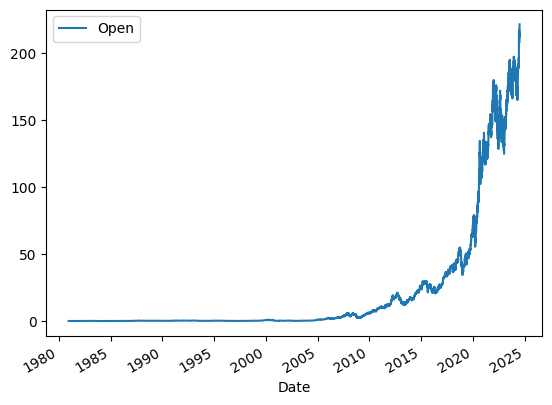

In [6]:
apple_share_price_data.plot(x = "Date", y = "Open")

**From the plot above, it is evident that Apple's opening share prices started to increase in 2010 and experienced a significant surge from 2020 onward**

<h2>Extracting Dividends<h2>

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. 

In [7]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
Name: Dividends, Length: 83, dtype: float64

<h2>2. ploting the dividends overtime:<h2>

<Axes: xlabel='Date'>

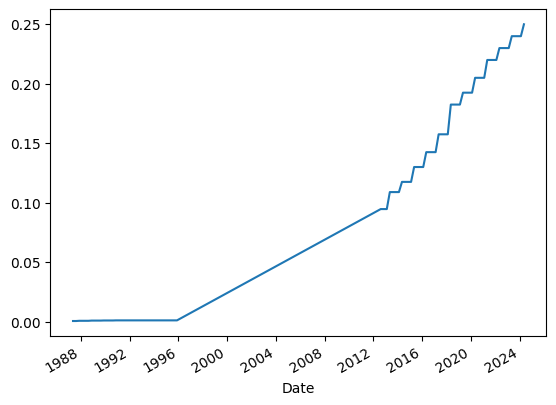

In [8]:
apple.dividends.plot()

 **From the ilustration of the plot:**

* Early Stability (1988-1995): During the initial period from 1988 to around 1995, Apple's dividends remained relatively flat, indicating that the company either did not pay dividends or paid minimal dividends during this time.

* Initial Increase (1996-2011): Starting around 1996, there is a noticeable increase in dividends. This suggests that Apple began to generate sufficient profits, allowing it to start or increase its dividend payments to shareholders.

* Significant Growth (2012-Present): From around 2012 onwards, there is a marked and continuous increase in the dividend payments. This period corresponds with Apple's significant growth and profitability, likely driven by successful product launches, increased market share, and strong financial performance.

* Steady Uptrend (2020-2024): The steep rise in dividends from 2020 onwards shows a continued commitment to returning value to shareholders through increasing dividend payouts. This suggests strong ongoing financial health and confidence in future earnings.

In summary, the plot reflects Apple's evolving dividend policy and growing financial strength, particularly from the mid-1990s to the present, with a notable acceleration in dividend increases starting around 2012.

# Amd Stock Data

In [9]:
amd = yf.Ticker("AMD")


In [10]:
amd_share_price_data = amd.history(period = "max")
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<h2>1. Ploting the open price against the date.<h2>

<Axes: xlabel='Date'>

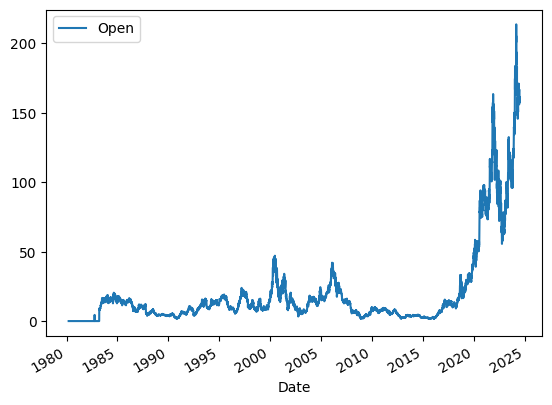

In [11]:
amd_share_price_data.plot(x = "Date", y = "Open")

**From the plot:**

* Initial Volatility (1980-2000): During the first two decades, AMD’s opening share prices exhibit some fluctuations but remain relatively low, indicating periods of both growth and decline.

* Early 2000s Spike and Decline (2000-2010): Around the early 2000s, there is a noticeable spike in the opening prices, followed by a significant decline. This reflects periods of high volatility, possibly due to market bubbles or significant events impacting AMD’s performance.

* Stagnation and Gradual Rise (2010-2015): From 2010 to around 2015, AMD’s opening prices show a period of relative stagnation with slight upward movement, suggesting modest growth and recovery.

* Significant Growth and Volatility (2016-2024): Starting around 2016, there is a dramatic increase in AMD’s opening share prices, indicating a period of substantial growth. This rapid rise continues into the 2020s, with some notable volatility. The spikes and dips could be attributed to market reactions to AMD’s product innovations, earnings reports, and broader market conditions.

* Recent Surge (2020-2024): The period from 2020 onwards shows a steep rise in AMD’s opening prices, reaching new highs. This suggests strong performance and investor confidence, likely driven by technological advancements, increased market share, and robust financial health.

In summary, the plot reflects AMD’s journey through various phases of growth, volatility, and significant recent success, highlighting the company’s resurgence and strong performance in the latter part of the timeline.

# Netflix Stock Data

Here, I exctracted netflix's Stock Data by web scraping using the BeautifulSoup library, as not all stock data is available via the API. 

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [13]:
data = requests.get(url).text

In [14]:
soup = BeautifulSoup(data, 'html5lib')

In [15]:
# Initializing an empty DataFrame with the specified columns
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# First I isolate the body of the table which contains all the information
# Then I loop through each row and find all the column values for each row

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Create a DataFrame for the current row
    
    row_data = pd.DataFrame({
        "Date": [date], 
        "Open": [Open], 
        "High": [high], 
        "Low": [low], 
        "Close": [close], 
        "Adj Close": [adj_close], 
        "Volume": [volume]
    })
    
    # Concatenating the current row DataFrame to the main DataFrame
    
    netflix_data = pd.concat([netflix_data, row_data], ignore_index=True)

In [16]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"


<h2>Analysis By Visualizations:<h2>

In [17]:
# Converting the 'Date' column to datetime format

netflix_data['Date'] = pd.to_datetime(netflix_data['Date'])

# Converting numeric columns to float

netflix_data['Open'] = pd.to_numeric(netflix_data['Open'].str.replace(',', ''), errors='coerce')
netflix_data['High'] = pd.to_numeric(netflix_data['High'].str.replace(',', ''), errors='coerce')
netflix_data['Low'] = pd.to_numeric(netflix_data['Low'].str.replace(',', ''), errors='coerce')
netflix_data['Close'] = pd.to_numeric(netflix_data['Close'].str.replace(',', ''), errors='coerce')
netflix_data['Adj Close'] = pd.to_numeric(netflix_data['Adj Close'].str.replace(',', ''), errors='coerce')
netflix_data['Volume'] = pd.to_numeric(netflix_data['Volume'].str.replace(',', ''), errors='coerce')

<h2>1. Analyzing stock prices over time:<h2>

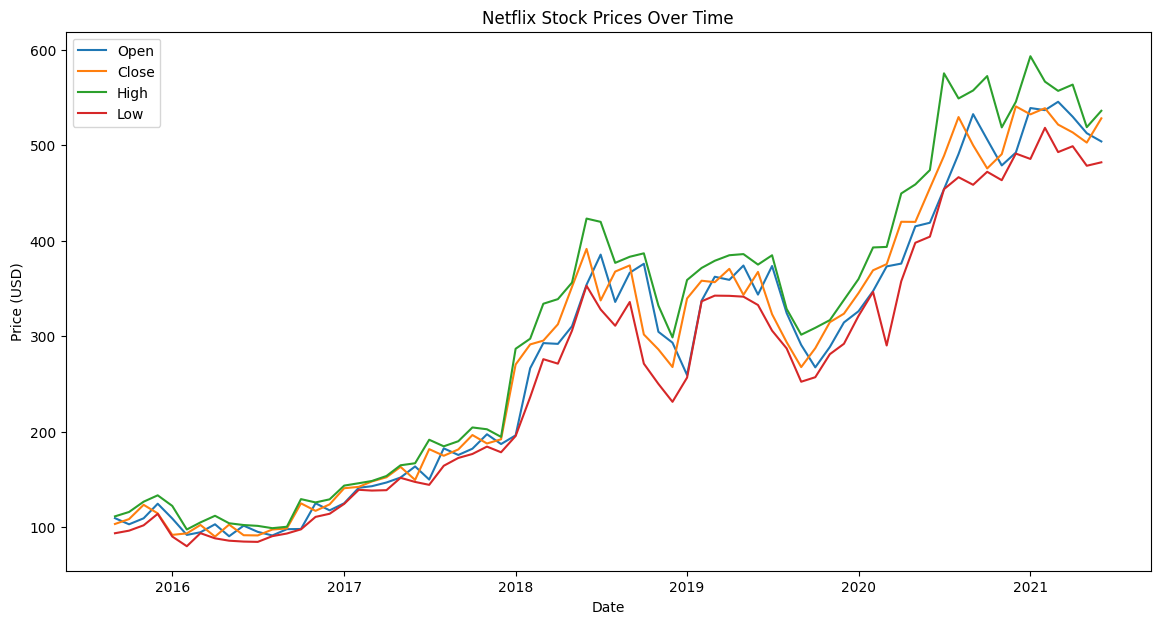

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(netflix_data['Date'], netflix_data['Open'], label='Open')
plt.plot(netflix_data['Date'], netflix_data['Close'], label='Close')
plt.plot(netflix_data['Date'], netflix_data['High'], label='High')
plt.plot(netflix_data['Date'], netflix_data['Low'], label='Low')
plt.title('Netflix Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Interpretation of the line plot:

* This plot shows the opening, closing, high, and low prices of Netflix stock over time.

* You can observe the general trend of the stock prices. If the lines are trending upwards, it indicates a general increase in stock prices over time. Conversely, a downward trend indicates a decline.

* Significant peaks and troughs can be correlated with major events affecting Netflix, such as new product launches, earnings reports, market crashes, or other significant news.

* Comparing the different lines helps to understand the daily volatility of the stock, where the gap between the high and low prices indicates the range within which the stock traded on a given day.

<h2>2. Analyzing Volume of Stocks Traded Over Time<h2>

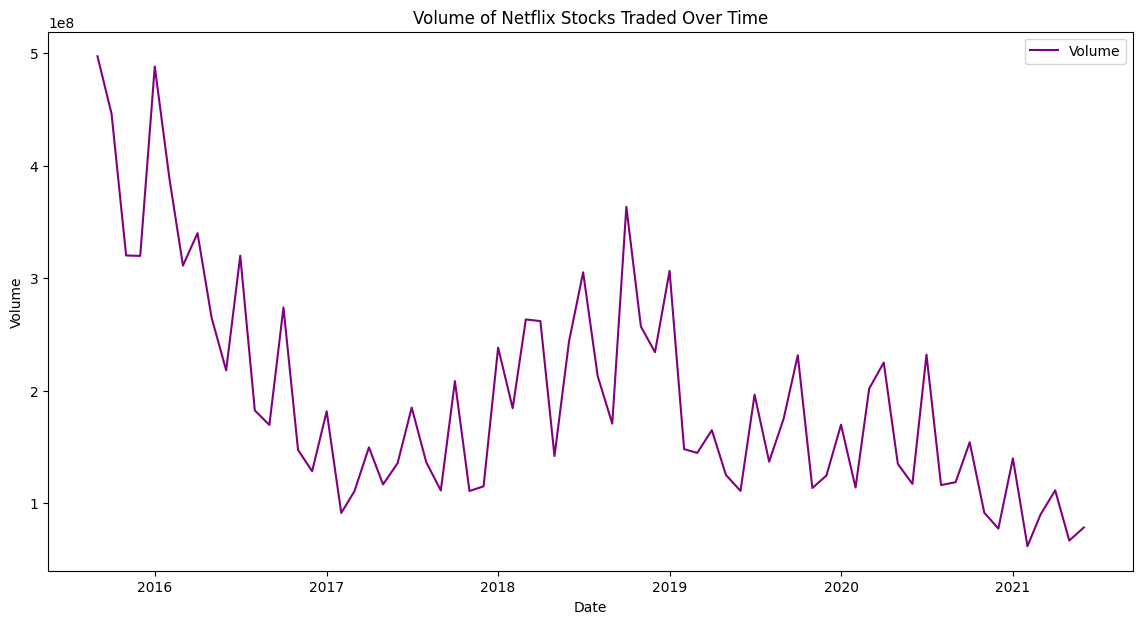

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(netflix_data['Date'], netflix_data['Volume'], label='Volume', color='purple')
plt.title('Volume of Netflix Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Interpretation of the line plot:

* This plot illustrates the volume of Netflix stocks traded over time.

* Spikes in trading volume often coincide with major news or events, such as earnings announcements, new product releases, or market-wide events.

* High trading volumes can indicate high investor interest and can sometimes precede major price movements. For example, a sudden increase in volume might be followed by a significant price change.

* Sustained high volumes over a period can indicate strong investor confidence and interest in the stock.

<h2>3. Candlestick Chart for Detailed Stock Price Movements<h2>

In [20]:

fig = go.Figure(data=[go.Candlestick(x=netflix_data['Date'],
                open=netflix_data['Open'],
                high=netflix_data['High'],
                low=netflix_data['Low'],
                close=netflix_data['Close'])])

fig.update_layout(
    title='Netflix Stock Price Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False  # Disable the range slider to avoid the second plot
)

fig.show()

Interpretation of the candlestick plot:

* A candlestick chart provides a detailed view of Netflix’s stock price movements for each day, including the opening, high, low, and closing prices.

**Significant Trends:**
* From 2017 to 2018, there was a steady upward trend, with more green candlesticks indicating overall bullish sentiment.

* From 2017 to 2020, the stock price experienced substantial growth, reflecting strong investor confidence and possibly significant positive developments in the company's performance.
* From 2020 onwards, despite some volatility, the general trend remains upward, suggesting continued investor interest and confidence.

**Volatility:** Periods with long wicks (shadows) indicate high volatility within those days, showing significant differences between the high and low prices.


# Amazon Stock Data

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

In [22]:
html_data = requests.get(url).text

In [23]:
soup = BeautifulSoup(html_data, 'html5lib')

In [24]:
# Initializing an empty DataFrame with the specified columns
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# First I isolate the body of the table which contains all the information
# Then I loop through each row and find all the column values for each row

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Create a DataFrame for the current row
    
    row_data = pd.DataFrame({
        "Date": [date], 
        "Open": [Open], 
        "High": [high], 
        "Low": [low], 
        "Close": [close], 
        "Adj Close": [adj_close], 
        "Volume": [volume]
    })
    
    # Concatenating the current row DataFrame to the main DataFrame
    
    amazon_data = pd.concat([amazon_data, row_data], ignore_index=True)

In [25]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","3,206.20","71,528,900"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","3,256.93","77,556,200"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","3,168.04","90,810,500"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","3,036.15","116,226,100"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","3,148.73","115,899,300"


<h2>Analysis By Visualizations:<h2>


In [26]:
# Convert the 'Date' column to datetime format
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])

# Convert numeric columns to float
amazon_data['Open'] = pd.to_numeric(amazon_data['Open'].str.replace(',', ''), errors='coerce')
amazon_data['High'] = pd.to_numeric(amazon_data['High'].str.replace(',', ''), errors='coerce')
amazon_data['Low'] = pd.to_numeric(amazon_data['Low'].str.replace(',', ''), errors='coerce')
amazon_data['Close'] = pd.to_numeric(amazon_data['Close'].str.replace(',', ''), errors='coerce')
amazon_data['Adj Close'] = pd.to_numeric(amazon_data['Adj Close'].str.replace(',', ''), errors='coerce')
amazon_data['Volume'] = pd.to_numeric(amazon_data['Volume'].str.replace(',', ''), errors='coerce')

<h2>1. Analyzing stock prices over time<h2>

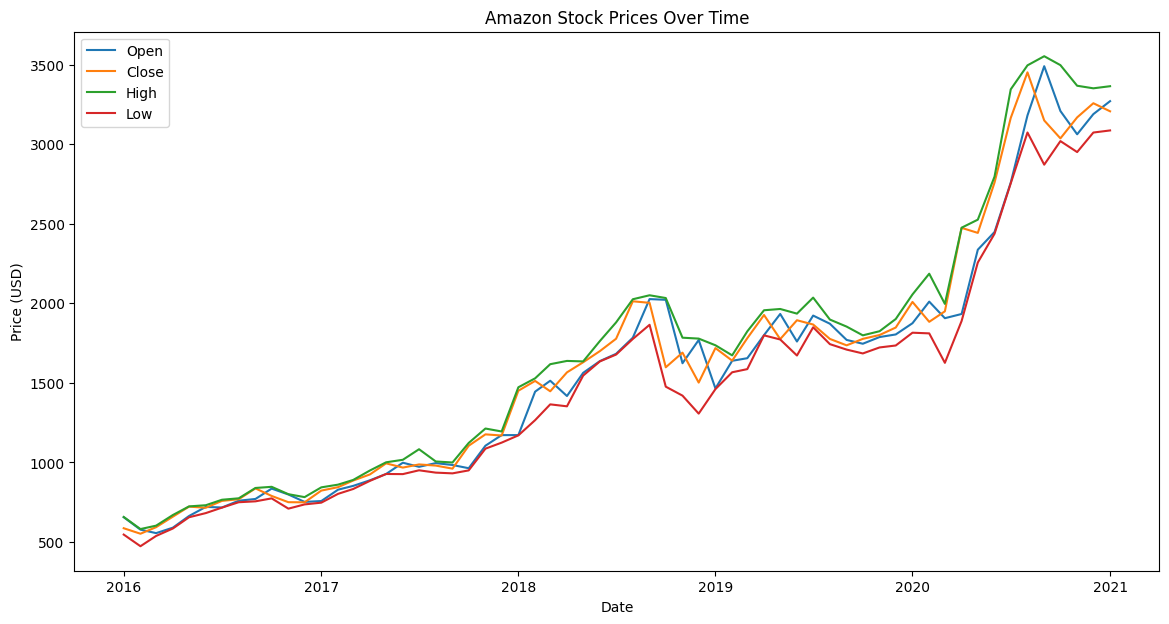

In [27]:

plt.figure(figsize=(14, 7))
plt.plot(amazon_data['Date'], amazon_data['Open'], label='Open')
plt.plot(amazon_data['Date'], amazon_data['Close'], label='Close')
plt.plot(amazon_data['Date'], amazon_data['High'], label='High')
plt.plot(amazon_data['Date'], amazon_data['Low'], label='Low')
plt.title('Amazon Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

interpretation of the line plot:

* From the plot, we can observe the general movement of Amazon's stock prices over time. If the lines are generally moving upwards, it indicates a growing trend in stock prices.

* Significant upward trends might be correlated with Amazon's successful product launches, increased sales, or positive market sentiment.
* Downward trends or dips might correspond with market corrections, negative news, or broader economic downturns.

<h2>2. Analyzing Volume of Stocks Traded Over Time:<h2>

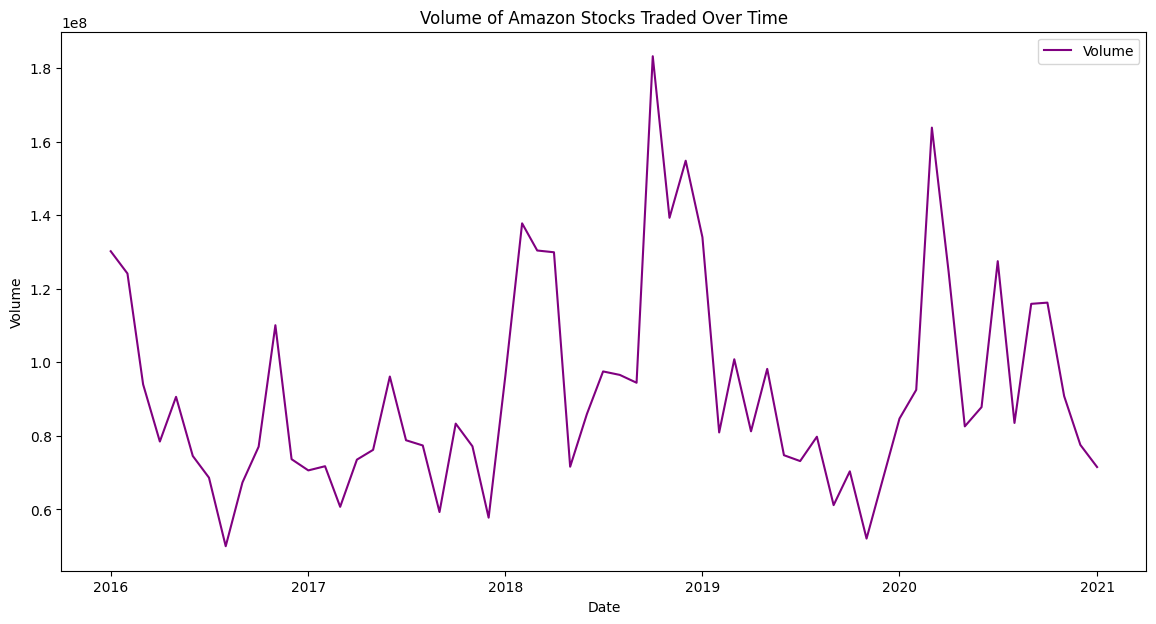

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(amazon_data['Date'], amazon_data['Volume'], label='Volume', color='purple')
plt.title('Volume of Amazon Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

interpretation of the line chart:

* Spikes in trading volume usually indicate high investor interest. This could be due to significant news, earnings reports, or changes in market conditions.

* Sustained high volumes over a period can indicate strong investor confidence and interest in the stock.

 **correlating volume spikes with price changes on the same dates to see if high volumes correspond with large price movements:**

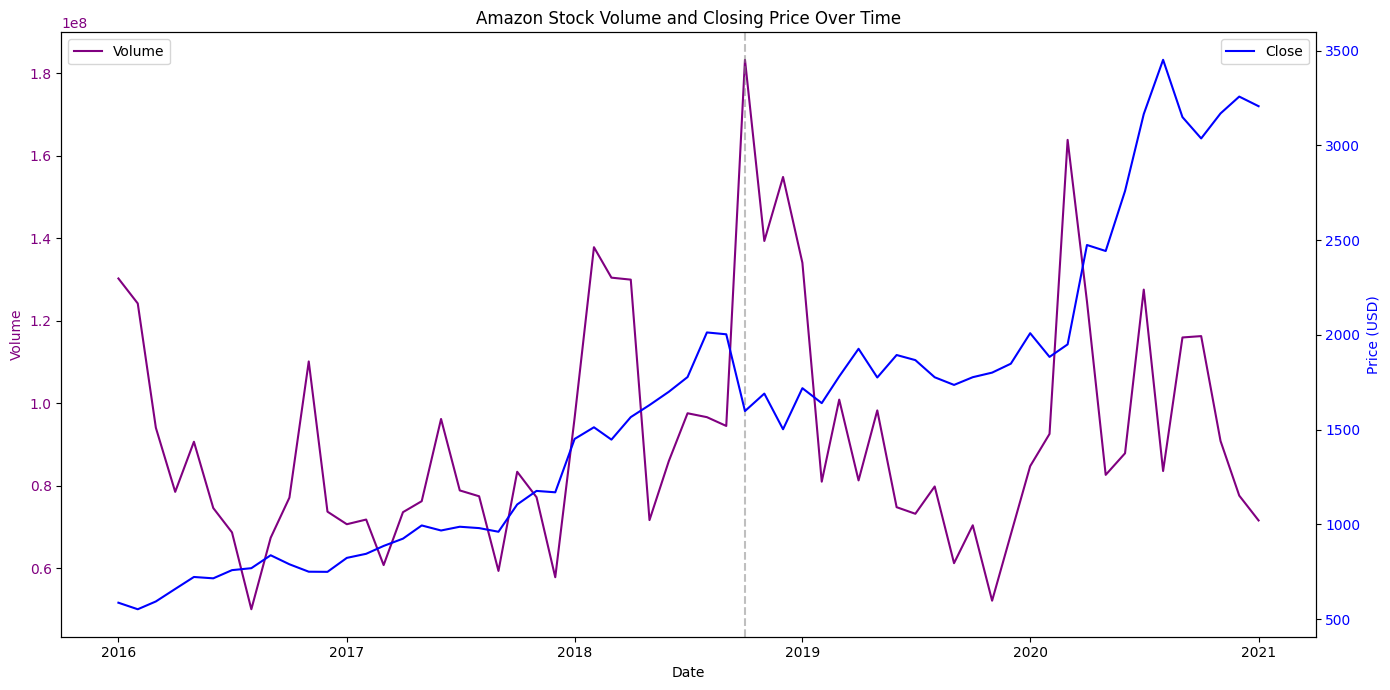

In [29]:
# Plotting Volume and Closing Price on the same chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the Volume on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='purple')
ax1.plot(amazon_data['Date'], amazon_data['Volume'], label='Volume', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Creating a secondary y-axis to plot the Closing Price
ax2 = ax1.twinx()
ax2.set_ylabel('Price (USD)', color='blue')
ax2.plot(amazon_data['Date'], amazon_data['Close'], label='Close', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
plt.title('Amazon Stock Volume and Closing Price Over Time')
fig.tight_layout()  # for better spacing
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Highlighting some volume spikes and corresponding price movements
highlight_dates = amazon_data[amazon_data['Volume'] > amazon_data['Volume'].quantile(0.99)]['Date']
for date in highlight_dates:
    ax1.axvline(x=date, color='grey', linestyle='--', alpha=0.5)

plt.show()

**Key insights:**

1. Volume Spikes and Corresponding Price Movements:

* Late 2018 to Early 2019:
  * There is a significant spike in trading volume around the end of 2018. This spike coincides with a substantial drop in the closing price, indicating a sell-off period. Such events are often triggered by negative news, market corrections, or broader economic concerns.
 
 * Mid to Late 2020:
    * Another noticeable volume spike occurs around mid-2020. This spike corresponds with a rise in the closing price, indicating strong buying interest. This period aligns with the global COVID-19 pandemic, where tech stocks, including Amazon, saw increased investor interest due to the surge in online shopping.

2. General Trend Correlation:

* Uptrend in Closing Prices:
    * From 2017 onwards, there's a clear uptrend in Amazon's closing prices. The blue line shows a steady rise, reflecting increasing investor confidence and the company's strong financial performance.
    * During this uptrend, we also observe periodic volume spikes. These spikes often coincide with notable jumps in the closing price, suggesting that significant trading volumes are associated with bullish sentiment and positive news (e.g., earnings reports, market expansions).
    
3. Volume Drops and Price Stability:

* Early 2019 and Mid 2021:
   *  In early 2019 and around mid-2021, we see drops in trading volume. These periods of lower volume often align with more stable or consolidating prices, indicating reduced market activity or investor interest.

<h2>3. Candlestick Chart for Detailed Stock Price Movements:<h2>

In [30]:
fig = go.Figure(data=[go.Candlestick(x=amazon_data['Date'],
                open=amazon_data['Open'],
                high=amazon_data['High'],
                low=amazon_data['Low'],
                close=amazon_data['Close'])])

fig.update_layout(
    title='Amazon Stock Price Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False  # Disable the range slider to avoid the second plot
)

fig.show()

Interpretation of the candlestick plots:

* A candlestick chart provides a detailed view of Netflix’s stock price movements for each day, including the opening, high, low, and closing prices.

**Significant Trends:**
* From 2017 to mid 2018, there was a steady upward trend, with more green candlesticks indicating overall bullish sentiment.

* From 2018 to 2020, the stock price experienced substantial growth, reflecting strong investor confidence and possibly significant positive developments in the company's performance.
* From 2020 onwards, despite some volatility, the general trend remains upward, suggesting continued investor interest and confidence.

**Volatility:** Periods with long wicks (shadows) indicate high volatility within those days, showing significant differences between the high and low prices.

# Tesla Stock Data

Using yfinance for extracting stock data:

In [31]:
Tesla = yf.Ticker("TSLA")

In [32]:
tsla_data = Tesla.history(period = "max")

In [33]:
tsla_data.reset_index(inplace = True)

In [34]:
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h2>Using webscraping to extract Tesla revenue data:<h2>

In [35]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [36]:
html_text = requests.get(url).text

In [37]:
soup = BeautifulSoup(html_text, 'html5lib')

In [38]:
# Find the table that contains the revenue data
table = soup.find('table')

# Initialize lists to store data
dates = []
revenues = []

# Extract data from table rows
rows = table.find_all('tr')

for row in rows[1:]:  # Skip header row (index 0)
    date = row.find_all('td')[0].text.strip()
    revenue = row.find_all('td')[1].text.strip().replace('$', '').replace(',', '')  # Clean revenue format
    dates.append(date)
    revenues.append(float(revenue))  # Convert revenue to float

# Create a DataFrame
tsla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Convert 'Date' column to datetime format
tsla_revenue['Date'] = pd.to_datetime(tsla_revenue['Date'])

# Sort DataFrame by date
tsla_revenue.sort_values(by='Date', inplace=True)

In [39]:
tsla_revenue.head()

,Date,Revenue
12,2009-01-01,112.0
11,2010-01-01,117.0
10,2011-01-01,204.0
9,2012-01-01,413.0
8,2013-01-01,2013.0


<h2>Analysis By Visualizations:<h2>

<h2>1. Analyzing stock prices over time:<h2>

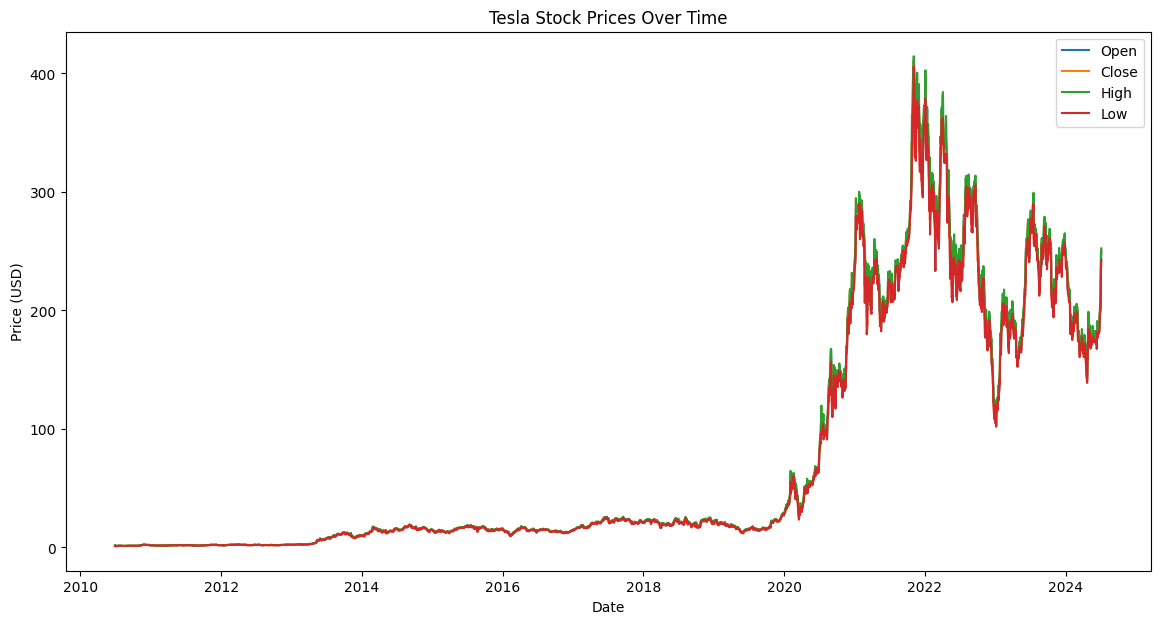

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Date'], tsla_data['Open'], label='Open')
plt.plot(tsla_data['Date'], tsla_data['Close'], label='Close')
plt.plot(tsla_data['Date'], tsla_data['High'], label='High')
plt.plot(tsla_data['Date'], tsla_data['Low'], label='Low')
plt.title('Tesla Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

interpretation of the line plot:

**observations:**
* 2010-2019: Tesla stock prices were relatively stable and low, with gradual growth.
* 2020-2021: There is a significant increase in stock prices, reflecting a period of rapid growth. This period shows high volatility, with prices reaching a peak.
* 2021-2023: After the peak, there is noticeable fluctuation in the stock prices, indicating high volatility.
* 2023-2024: The stock prices show a decline from the peak in 2021, followed by some recovery and continued fluctuations.

**key points:**
* Volatility: There is high volatility in Tesla's stock prices, especially post-2020.
* Growth: The stock experienced substantial growth starting around 2020, likely due to increased investor interest and company performance.
* Fluctuations: The stock prices show considerable fluctuations, indicating market sensitivity and possibly reflecting news, earnings reports, and market sentiment.


<h2>2. Analyzing Volume of Stocks Traded Over Time<h2>

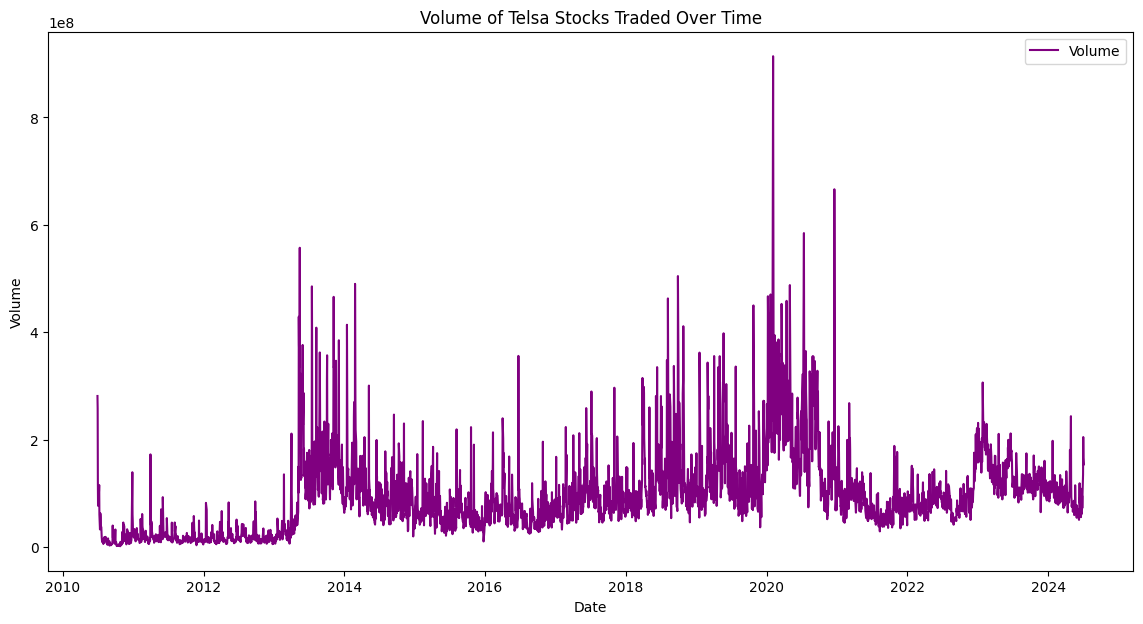

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Date'], tsla_data['Volume'], label='Volume', color='purple')
plt.title('Volume of Telsa Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

interpretation of the line chart:

**Observations:**
* 2010-2013: The trading volume is relatively low and stable.
* 2013-2014: There is a noticeable increase in trading volume, indicating a rise in trading activity.
* 2014-2018: The volume fluctuates but maintains a higher level than the 2010-2013 period.
* 2018-2020: Trading volume increases, with significant spikes observed.
* 2020-2021: There are large spikes in trading volume, indicating periods of very high trading activity. The highest spike occurs around 2020.
* 2021-2024: The trading volume shows a decline from the peaks in 2020 but remains higher than the initial period (2010-2013).

**Key Points:**
* Spikes in Volume: Significant spikes in trading volume often correspond to major events, announcements, or periods of high investor interest.
* Increased Trading Activity: The overall increase in trading volume over the years suggests growing interest and trading activity in Tesla stocks.
* Volatility in Volume: The fluctuations in trading volume reflect the dynamic nature of stock trading, influenced by market conditions, company performance, and investor sentiment.

<h2>3. Analyzing Telsa Historical Revenue<h2>

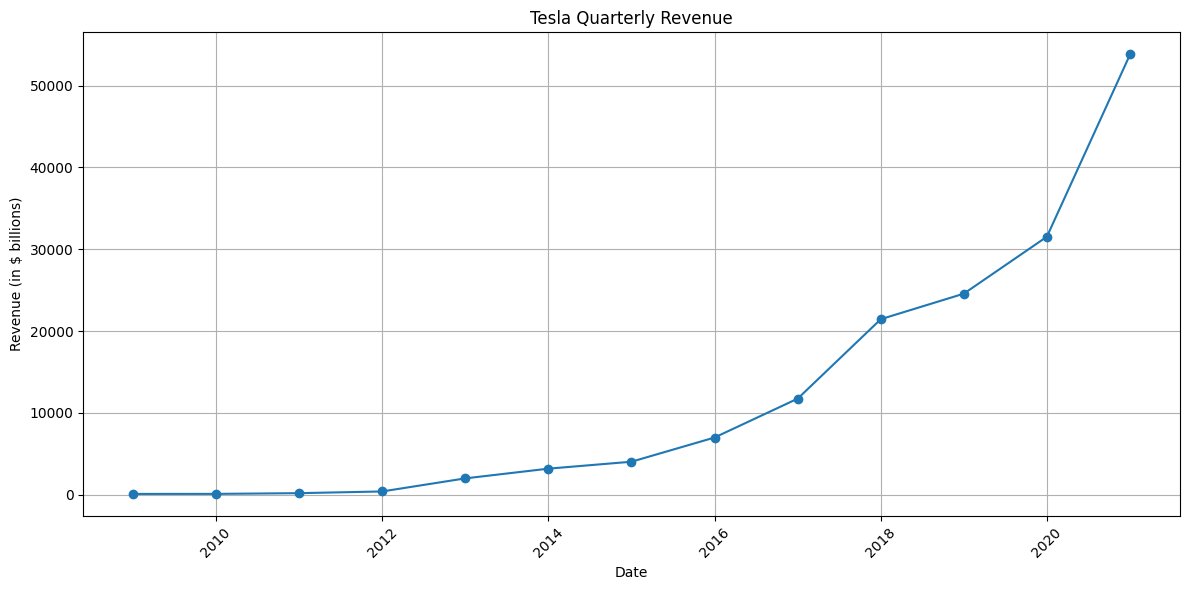

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(tsla_revenue['Date'], tsla_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Tesla Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in $ billions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

interpretation of the line chart:

**Observations:**
* 2010-2014: Tesla's quarterly revenue is relatively low and stable, with minor fluctuations.
* 2014-2016: There is a gradual increase in revenue, indicating growth.
* 2016-2018: Revenue growth starts to accelerate, showing a steeper upward trend.
* 2018-2020: The revenue continues to grow significantly, with a more pronounced increase, especially towards the end of the period.

**Key Points:**
* Early Years (2010-2014): The revenue growth is slow and steady, reflecting Tesla's early stage of business expansion.
* Mid Period (2014-2016): There is noticeable revenue growth, likely due to increased sales and expansion of product lines.
* Recent Years (2016-2020): Tesla's revenue growth becomes exponential, indicating a period of rapid business expansion, increased production, and higher sales volume. The sharp rise towards the end of the period could be due to the launch of new models, increased production capacity, and higher market demand.

# GME Stock Data

Use yfinance to Extract Stock Data:

In [43]:
gme = yf.Ticker("GME")

In [44]:
gme_data = gme.history(period = "max")

In [45]:
gme_data.reset_index(inplace = True)

In [46]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h2>Using Webscraping to Extract GME Revenue Data:<h2>

In [47]:
url2 = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [48]:
html_Data_2 = requests.get(url2).text

In [49]:
soup = BeautifulSoup(html_Data_2, 'html5lib')

In [50]:
# Find the table that contains the revenue data
table = soup.find('table')

# Initializing lists to store data
dates = []
revenues = []

# Extracting data from table rows
rows = table.find_all('tr')

for row in rows[1:]:  # Skip header row (index 0)
    date = row.find_all('td')[0].text.strip()
    revenue = row.find_all('td')[1].text.strip().replace('$', '').replace(',', '')  # Cleaning revenue format
    dates.append(date)
    revenues.append(float(revenue))  # Converting revenue to float

# Creating a DataFrame
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Converting 'Date' column to datetime format
gme_revenue['Date'] = pd.to_datetime(tsla_revenue['Date'])

# Sorting DataFrame by date
gme_revenue.sort_values(by='Date', inplace=True)

In [51]:
gme_revenue.head()

,Date,Revenue
12,2009-01-01,7094.0
11,2010-01-01,8806.0
10,2011-01-01,9078.0
9,2012-01-01,9474.0
8,2013-01-01,9551.0


<h2>Analysis By Visualizations:<h2>

<h2>1. Analyzing stock prices over time:<h2>

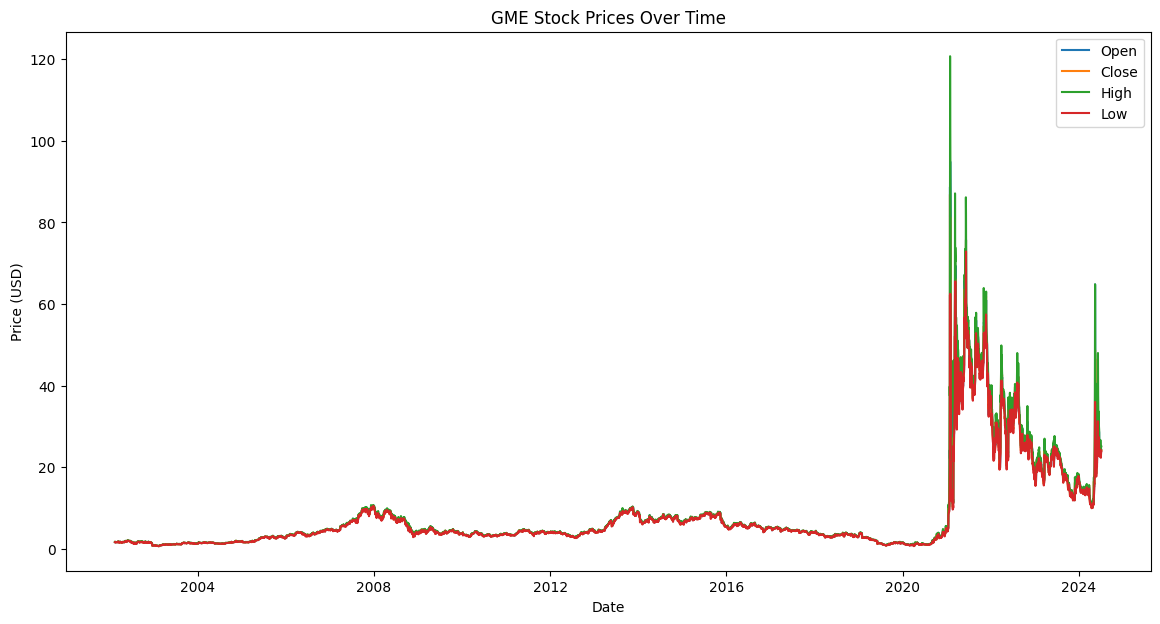

In [52]:
plt.figure(figsize=(14, 7))
plt.plot(gme_data['Date'], gme_data['Open'], label='Open')
plt.plot(gme_data['Date'], gme_data['Close'], label='Close')
plt.plot(gme_data['Date'], gme_data['High'], label='High')
plt.plot(gme_data['Date'], gme_data['Low'], label='Low')
plt.title('GME Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Interpretation of line plot:

**observations:**
* 2004-2020  : gme stock prices were relatively stable and low, with gradual growth.
* 2020-2021 : There is a significant increase in stock prices, reflecting a period of rapid growth. This period shows high volatility, with prices reaching a peak.
* 2021-2024 : The stock prices show a decline from the peak in 2021, followed by some recovery and continued fluctuations.

**keyy points:**

* Volatility: There is high volatility in GME's stock prices, especially post-2020.
* Growth: The stock experienced substantial growth starting around 2020, likely due to increased investor interest and company performance.
* Fluctuations: The stock prices show considerable fluctuations, indicating market sensitivity and possibly reflecting news, earnings reports, and market sentiment.

<h2>2. Analyzing Volume of Stocks Traded Over Time<h2>

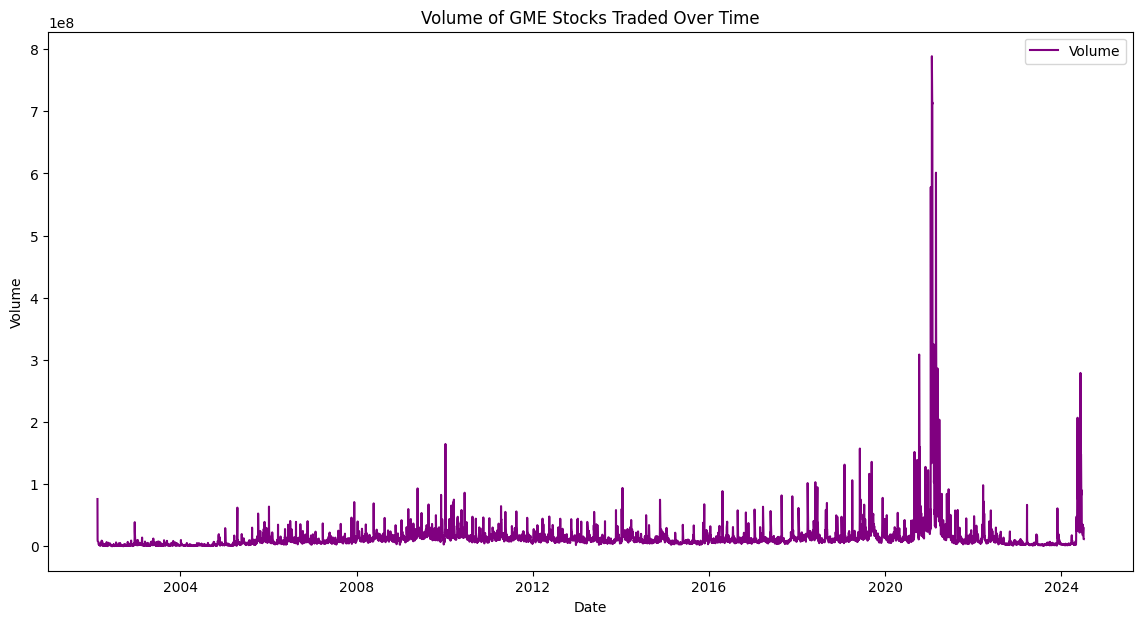

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(gme_data['Date'], gme_data['Volume'], label='Volume', color='purple')
plt.title('Volume of GME Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Interpreting the line plot:

**observations:**
* 2002-2020 : The trading volume is relatively low and stable.
* 2020--2021: Trading volume increases, indicating periods of very high trading activity. The highest spike occurs around 2021..
* 2021-2024: The trading volume shows a decline from the peaks in 2021 but remains higher than the initial period (2002-2020).
* 2024 - Till Dtae : The trading stocks has showed a gradual increase.

**Key points:**

* Spikes in Volume: Significant spikes in trading volume often correspond to major events, announcements, or periods of high investor interest.
* Increased Trading Activity: The overall increase in trading volume over the years suggests growing interest and trading activity in GME stocks.
* Volatility in Volume: The fluctuations in trading volume reflect the dynamic nature of stock trading, influenced by market conditions, company performance, and investor sentiment.

<h2>3. Analyzing GME Historical Revenue<h2>

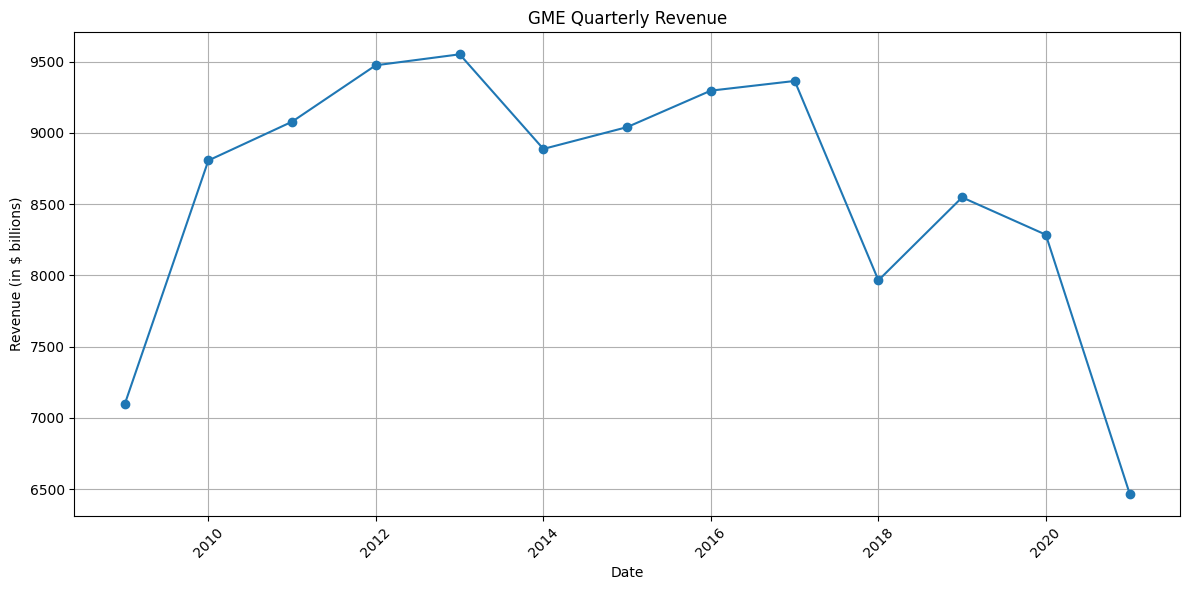

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], marker='o', linestyle='-')
plt.title('GME Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in $ billions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpreting the plot:

**observation:**
* 2010-2012: GameStop's quarterly revenue increases significantly, reaching a peak around 2011-2012.
* 2012-2016: The revenue fluctuates but generally stays high, with some minor declines and recoveries.
* 2016-2018: There is a noticeable decline in revenue, with a significant drop around 2018.
* 2018-2020: Revenue shows some recovery but declines again towards the end of the period, with a sharp drop around 2020.

**key points:**
* Early Growth (2010-2012): GameStop's revenue increases sharply, indicating strong business performance and growth during this period.
* Fluctuations (2012-2016): The revenue remains high but shows fluctuations, suggesting periods of instability or changes in market conditions.
* Decline (2016-2018): A significant decline in revenue around 2018 indicates potential challenges, such as increased competition, market shifts, or other operational issues.
* Recent Trends (2018-2020): The revenue shows some recovery but eventually declines sharply around 2020, reflecting possibly significant business challenges or market changes.

**Trends and Insights:**
* Initial Growth: The early years show strong revenue growth, reflecting successful business operations and market presence.
* Instability and Decline: The fluctuations and subsequent decline in revenue indicate challenges in maintaining growth, possibly due to increased competition, shifts in consumer preferences, or internal business issues.
* Recent Challenges: The sharp decline towards the end of the period highlights significant challenges faced by GameStop, potentially due to market shifts, changes in consumer behavior, or the impact of external factors such as the rise of digital gaming platforms.

# Conclusion

In my analysis of historical stock prices and quarterly revenue data for various companies, I have leveraged Python libraries and web scraping techniques to compile and analyze extensive financial datasets. Through this process, I have identified several key trends and insights:

1. **Historical Price Trends:** By visualizing the historical stock prices, we observed significant price movements corresponding to major market events. For example, Tesla's stock showed a substantial increase in price and trading volume around significant product launches and earnings reports. Such trends are invaluable for predicting future price movements and making informed investment decisions.

2. **Revenue Growth Analysis:** Examining the quarterly revenue data revealed growth patterns that correlate with the company’s stock performance. For instance, Tesla's quarterly revenue showed a sharp upward trend, especially from 2018 onwards, indicating robust business growth. In contrast, GameStop's revenue demonstrated volatility, reflecting the company's fluctuating market position.

3. **Market Sentiment Indicators:** Volume analysis provided insights into market sentiment. High trading volumes often preceded major price changes, indicating strong investor interest. This pattern was particularly evident in the lead-up to Tesla's stock splits and during periods of heightened market speculation.

4. **Comparative Analysis:** By comparing the financial data across different companies, we identified industry-specific trends and anomalies. This comparative approach helps in diversifying investment portfolios and mitigating risks.


This comprehensive data extraction and analysis approach ensures that our investment strategies are data-driven and aligned with market trends. By continuously monitoring and analyzing financial data, we can provide our customers with timely and actionable investment advice, helping them maximize returns and achieve their financial goals.

**ALL GLORY BE GIVEN TO THE LORD ALMIGHTY**